In [1]:
from src.datasource.datasource import DataSource
from src.embedder.embedder import Embedder
from datasets import load_dataset
from src.utils import tune_model, evaluate_model, load_test_data
from sentence_transformers import losses
from dotenv import load_dotenv

/Users/mikhailkoutun/PycharmProjects/searchEngine/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
queries_dataset = load_dataset("CoIR-Retrieval/cosqa", "queries")["queries"]
corpus_dataset = load_dataset("CoIR-Retrieval/cosqa", "corpus")["corpus"]
default_dataset = load_dataset("CoIR-Retrieval/cosqa", "default")
test_corpus = [function for partition, function in zip(corpus_dataset["partition"], corpus_dataset["text"]) if
               partition == "test"]
test_queries = [query for partition, query in zip(queries_dataset["partition"], queries_dataset["text"]) if
                partition == "test"]

Step,Training Loss
500,0.084600
1000,0.047900
1500,0.039200
2000,0.032100
2500,0.027500
3000,0.024000
3500,0.018800
4000,0.018800
4500,0.018400
5000,0.017800


/Users/mikhailkoutun/PycharmProjects/searchEngine/.venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/mikhailkoutun/PycharmProjects/searchEngine/.venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/mikhailkoutun/PycharmProjects/searchEngine/.venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/mikhailkoutun/PycharmProjects/searchEngine/.venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS 

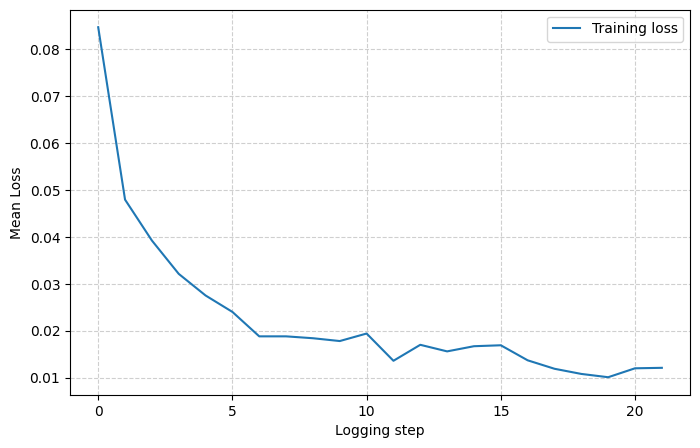

In [5]:
model = Embedder("sentence-transformers/all-MiniLM-L6-v2", 384)
loss = losses.MultipleNegativesRankingLoss
tune_model(model, loss, default_dataset, corpus_dataset, queries_dataset, 20, True)

In [7]:
load_dotenv()

print("Qwen")
model = Embedder("Qwen/Qwen3-Embedding-0.6B", 1024)
db = DataSource(model)
await load_test_data(db, "code-test", test_corpus, True)
await evaluate_model(model, "code-test", test_queries, test_corpus)

print("miniLM: ")
model = Embedder("sentence-transformers/all-MiniLM-L6-v2", 384)
db = DataSource(model)
await load_test_data(db, "code-test", test_corpus, True)
await evaluate_model(model, "code-test", test_queries, test_corpus)

print("Tuned miniLM: ")
model = Embedder("sentence-transformers/all-MiniLM-L6-v2", 384, load_tuned=True)
await evaluate_model(model, "code-test", test_queries, test_corpus)

Qwen
1.0
0.8764857142857143
0.905437919527317
miniLM: 
1.0
0.8093507936507935
0.8511737977500772
Tuned miniLM: 
1.0
0.8487134920634921
0.8836418335149921
